In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [114]:
df = pd.read_excel('youtube_statistics.xlsx')

In [115]:
df.shape

(36791, 18)

Dataset memiliki 36791 baris dan 18 kolom

In [116]:
df.sample(2)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
13510,2018-01-27,Tu Aashiqui - 25th January 2018 - तू आशिकी,Colors TV,24,03:50:56,"Colors TV|""colorstv""|""hindi shows""|""VOOT""|""new...",139215,747,55,31,False,False,False,To watch the full episode of 'Tu Aashiqui' any...,26,484,42,2018-01-26
27916,2018-04-26,People During Summer - 2 | ft. Pichi Yakuu | W...,Warangal Diaries,23,14:55:00,"warangal diaries|""latest""|""funny""|""comedy""|""Ba...",330996,15721,610,2084,False,False,False,(Earphone Use Is Recommended)!!\nTypes And Kin...,27,1242,61,2018-04-22


# Descriptive Statistic

## Cek Tipe data

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

`trending_date` memiliki tipe data yang tidak sesuai harusnya datetime dan kolom `description` memiliki nilai null

In [118]:
df.describe()

,category_id,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,36791.000000,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,36791.000000,36791.000000
mean,21.552173,1.071490e+06,2.745069e+04,1.685363e+03,2714.022043,18.938463,923.079123,70.609361
std,6.586716,3.207149e+06,9.783129e+04,1.619732e+04,14978.114328,9.843531,815.038867,22.409174
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000
25%,23.000000,1.256040e+05,8.790000e+02,1.090000e+02,83.000000,12.000000,368.000000,53.000000
50%,24.000000,3.078360e+05,3.126000e+03,3.310000e+02,336.000000,19.000000,677.000000,74.000000
75%,24.000000,8.066315e+05,1.409500e+04,1.032000e+03,1314.500000,25.000000,1237.000000,91.000000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000


nilai mean dan median pada kolom `views`, `dislikes`, dan `desc_len` memiliki selisih yang besar

# EDA

In [119]:
df_raw = df.copy()

## Kategorikal, Numerikal dan Waktu

In [120]:
cats = ['title', 'channel_title', 'tags', 'comments_disabled','ratings_disabled', 'video_error_or_removed', 'description']
nums = ['views', 'likes', 'dislikes', 'comment_count','No_tags', 'desc_len', 'len_title']
waktu = ['trending_date', 'publish_time', 'publish_date']

In [121]:
df_raw[cats].describe()

,title,channel_title,tags,comments_disabled,ratings_disabled,video_error_or_removed,description
count,36791,36791,36791,36791,36791,36791,36746
unique,16431,1390,12463,2,2,2,13979
top,Mission: Impossible - Fallout (2018) - Officia...,VikatanTV,[none],False,False,False,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...
freq,19,284,1120,35611,36034,36780,166


In [122]:
df_raw[nums].describe()

,views,likes,dislikes,comment_count,No_tags,desc_len,len_title
count,3.679100e+04,3.679100e+04,3.679100e+04,36791.000000,36791.000000,36791.000000,36791.000000
mean,1.071490e+06,2.745069e+04,1.685363e+03,2714.022043,18.938463,923.079123,70.609361
std,3.207149e+06,9.783129e+04,1.619732e+04,14978.114328,9.843531,815.038867,22.409174
min,4.024000e+03,0.000000e+00,0.000000e+00,0.000000,1.000000,3.000000,5.000000
25%,1.256040e+05,8.790000e+02,1.090000e+02,83.000000,12.000000,368.000000,53.000000
50%,3.078360e+05,3.126000e+03,3.310000e+02,336.000000,19.000000,677.000000,74.000000
75%,8.066315e+05,1.409500e+04,1.032000e+03,1314.500000,25.000000,1237.000000,91.000000
max,1.254322e+08,2.912710e+06,1.545017e+06,827755.000000,72.000000,5136.000000,100.000000


In [123]:
df_raw[waktu].describe()

,trending_date,publish_time,publish_date
count,36791,36791,36791
unique,205,12375,219
top,2017-12-23,04:30:00,2018-05-17 00:00:00
freq,199,333,318
first,NaN,NaN,2017-05-27 00:00:00
last,NaN,NaN,2018-06-13 00:00:00


# Univariate Analysis

### Numerikal

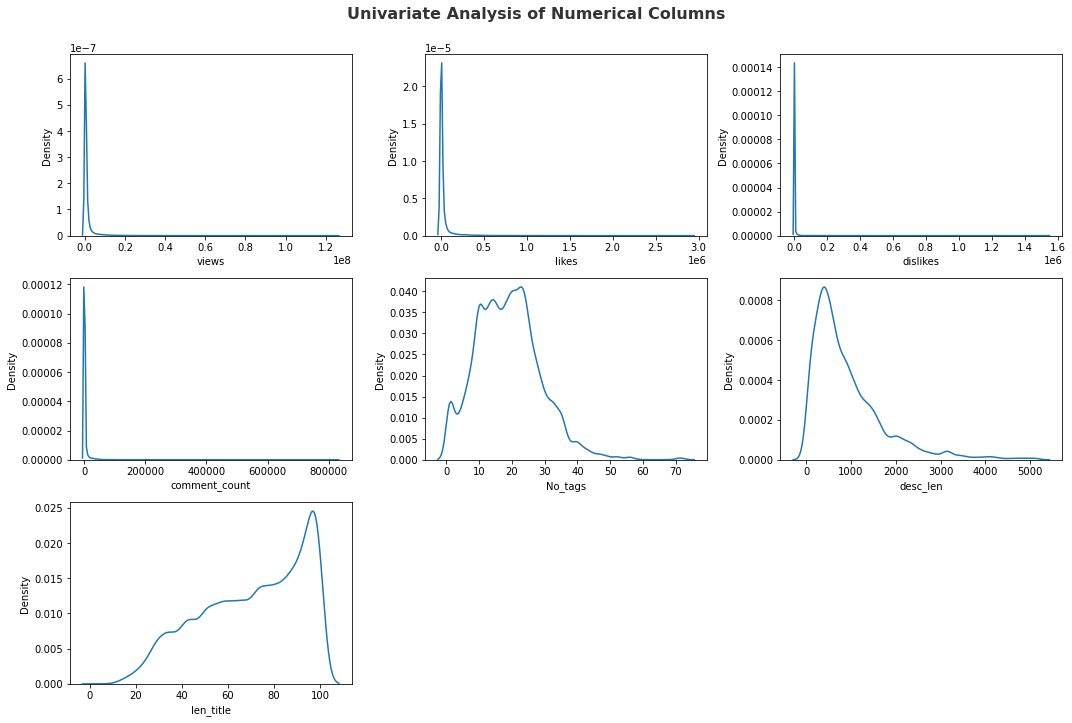

In [124]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Columns', fontsize=16, fontweight='bold', alpha=0.8, y=1.)

for i, col in enumerate(nums):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(x=df_raw[col])
    plt.xlabel(col)
    plt.tight_layout()

plt.show()

### Kategorikal

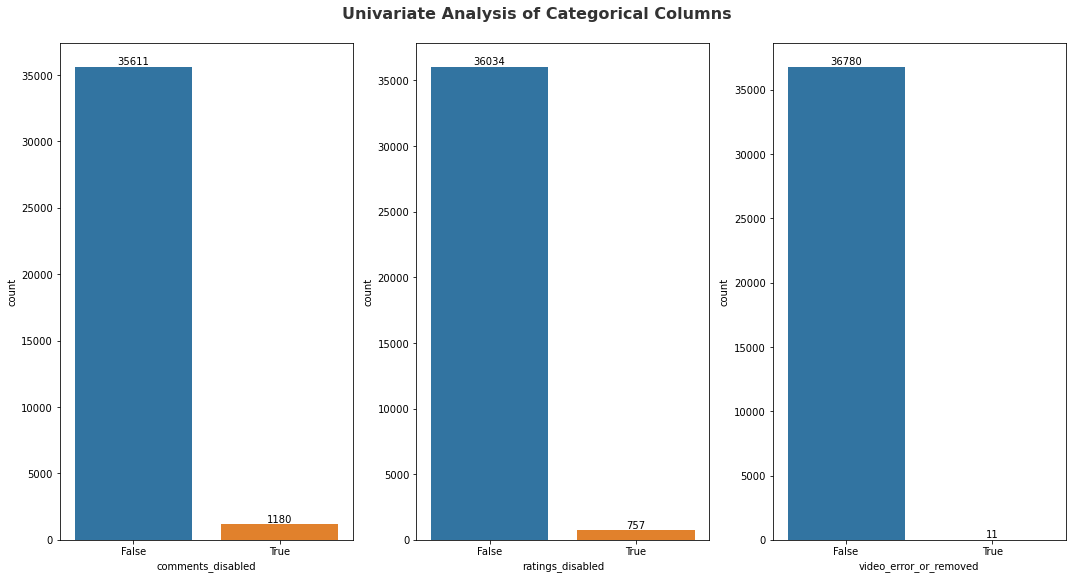

In [125]:
cats_col = ['comments_disabled', 'ratings_disabled', 'video_error_or_removed']

plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Columns', fontsize=16, fontweight='bold', alpha=0.8, y=1.)

for i, col in enumerate(cats_col):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=df_raw[col])

    container_info = df_raw[col].value_counts()
    for idx, val in enumerate(container_info.values):
        plt.text(idx, val, str(val), ha='center', va='bottom')

    plt.xlabel(col)
    plt.tight_layout()

plt.show()

### Trending Date

In [126]:
df_raw['trending_date'] = pd.to_datetime(df_raw['trending_date'])

# Memisahkan tanggal menjadi bagian-bagian terpisah (tahun, bulan, hari)
df_raw['year'] = df_raw['trending_date'].dt.year
df_raw['month'] = df_raw['trending_date'].dt.month
df_raw['day'] = df_raw['trending_date'].dt.day
df_raw['week'] = df_raw['trending_date'].dt.isocalendar().week

#### Daily Trend

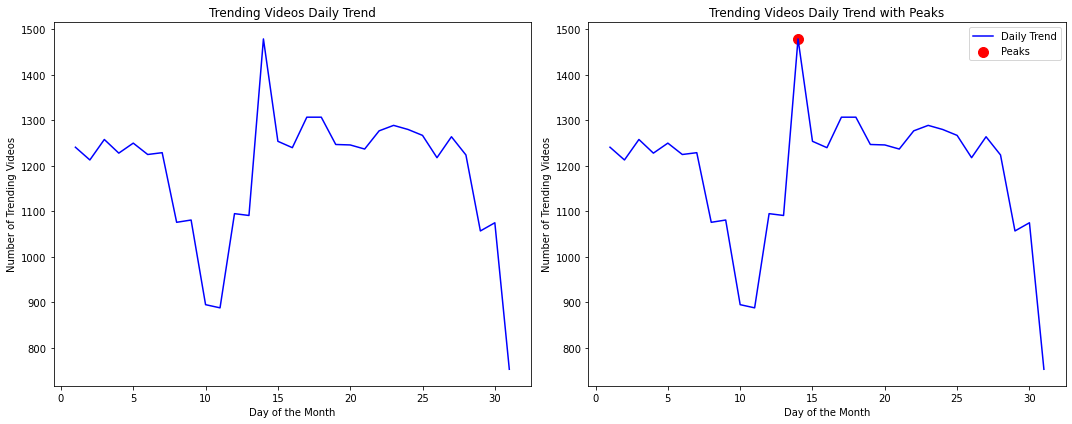

In [127]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Tren harian
daily_trend = df_raw.groupby(df_raw['trending_date'].dt.day)['trending_date'].count()
axs[0].plot(daily_trend.index, daily_trend.values, label='Daily Trend', color='blue')
axs[0].set_title('Trending Videos Daily Trend')
axs[0].set_xlabel('Day of the Month')
axs[0].set_ylabel('Number of Trending Videos')

# Puncak pada tren harian
peaks = daily_trend[daily_trend == daily_trend.max()]
axs[1].plot(daily_trend.index, daily_trend.values, label='Daily Trend', color='blue')
axs[1].scatter(peaks.index, peaks.values, color='red', s=100, label='Peaks')
axs[1].set_title('Trending Videos Daily Trend with Peaks')
axs[1].set_xlabel('Day of the Month')
axs[1].set_ylabel('Number of Trending Videos')

plt.tight_layout()
plt.legend()
plt.show()

#### Weekly Trend

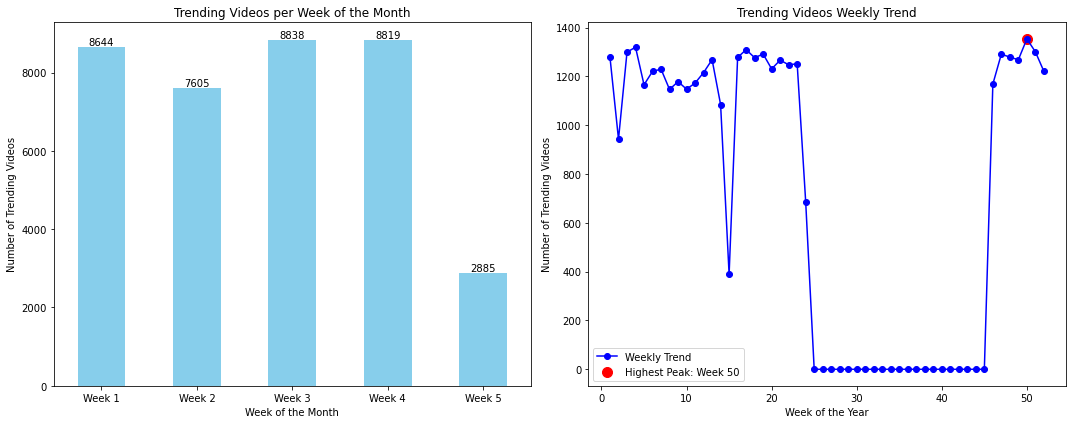

In [128]:
df_raw['week_of_month'] = df_raw['trending_date'].dt.day.apply(lambda x: (x - 1) // 7 + 1)

# Visualisasi tren per minggu dalam sebulan
weekly_trend_month = df_raw.groupby('week_of_month')['trending_date'].count()

# Visualisasi tren mingguan dalam setahun
weekly_trend_year = df_raw.groupby(df_raw['trending_date'].dt.isocalendar().week)['trending_date'].count()

# Plotting both trends together using subplots and iteration
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Tren per minggu dalam sebulan
bars = weekly_trend_month.plot(kind='bar', color='skyblue', ax=axs[0])
for bar in bars.patches:
    axs[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height()}', 
             ha='center', va='bottom')
axs[0].set_title('Trending Videos per Week of the Month')
axs[0].set_xlabel('Week of the Month')
axs[0].set_ylabel('Number of Trending Videos')
axs[0].set_xticklabels([f'Week {i}' for i in weekly_trend_month.index], rotation=0)

# Tren mingguan dalam setahun dengan hanya puncak tertinggi
all_weeks = pd.Series(np.arange(1, 53))
weekly_trend_year = weekly_trend_year.reindex(all_weeks, fill_value=0)
peaks = weekly_trend_year[(weekly_trend_year.shift(1) < weekly_trend_year) & (weekly_trend_year.shift(-1) < weekly_trend_year)]
highest_peak = peaks[peaks == peaks.max()]

axs[1].plot(weekly_trend_year.index, weekly_trend_year.values, marker='o', linestyle='-', color='blue', label='Weekly Trend')
axs[1].scatter(highest_peak.index, highest_peak.values, color='red', s=100, label=f'Highest Peak: Week {highest_peak.index[0]}')
axs[1].set_title('Trending Videos Weekly Trend')
axs[1].set_xlabel('Week of the Year')
axs[1].set_ylabel('Number of Trending Videos')
axs[1].legend()

plt.tight_layout()
plt.show()

#### Monthly Trend

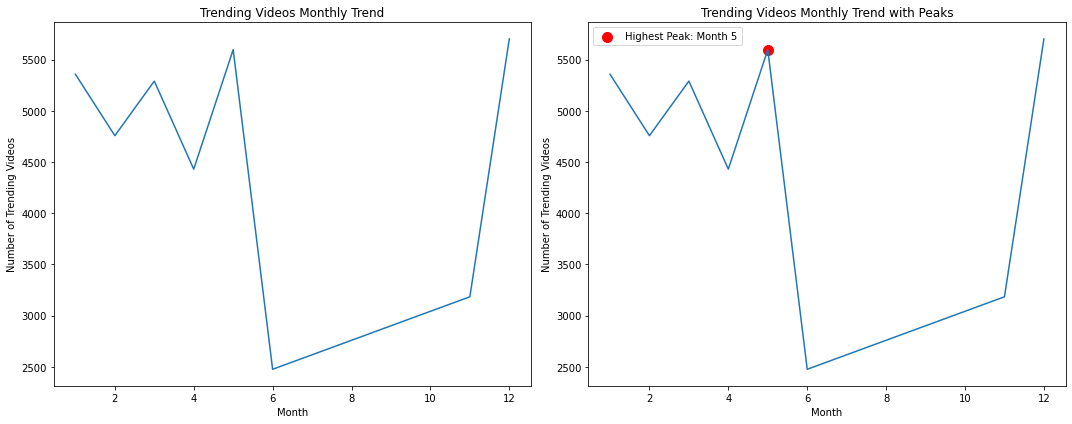

In [129]:
monthly_trend_count = df_raw.groupby('month')['trending_date'].count()

# Plotting both trends together using subplots and iteration
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Tren bulanan tanpa puncak
monthly_trend_count.plot(kind='line', ax=axs[0])
axs[0].set_title('Trending Videos Monthly Trend')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Number of Trending Videos')

# Tren bulanan dengan puncak
peaks = monthly_trend_count[(monthly_trend_count.shift(1) < monthly_trend_count) & (monthly_trend_count.shift(-1) < monthly_trend_count)]
max_month = peaks.idxmax()
axs[1].plot(monthly_trend_count.index, monthly_trend_count.values)
axs[1].scatter(max_month, monthly_trend_count[max_month], color='red', s=100, label=f'Highest Peak: Month {max_month}')
axs[1].set_title('Trending Videos Monthly Trend with Peaks')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Number of Trending Videos')
axs[1].legend()

plt.tight_layout()
plt.show()

#### Yearly Trend

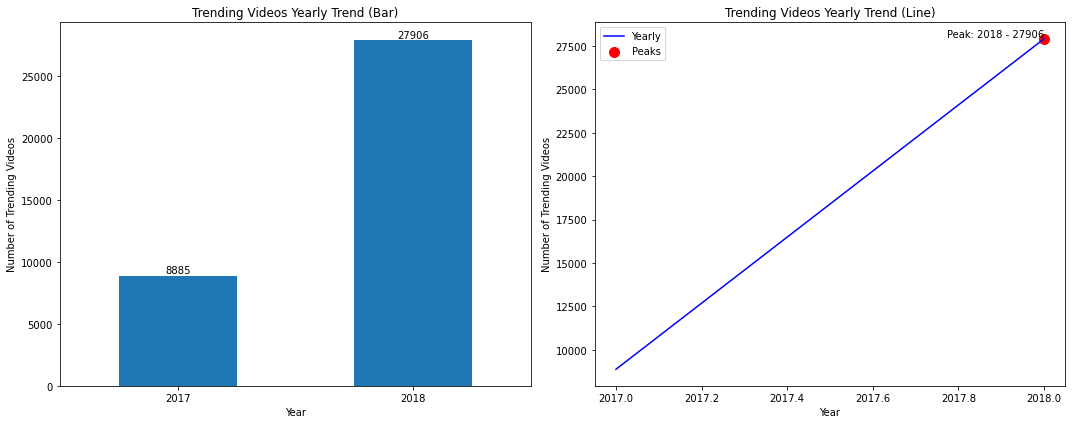

In [130]:
# Year
yearly_trend = df_raw.groupby(df_raw['trending_date'].dt.year)['trending_date'].count()
yearly_peaks = yearly_trend[yearly_trend == yearly_trend.max()]

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Yearly Trend
yearly_trend.plot(kind='bar', ax=axs[0])
axs[0].set_title('Trending Videos Yearly Trend (Bar)')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Number of Trending Videos')
axs[0].tick_params(axis='x', rotation=0)
for bar in axs[0].patches:
    axs[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height()}', 
                 ha='center', va='bottom')

# Yearly Trend with Peaks
axs[1].plot(yearly_trend.index, yearly_trend.values, label='Yearly', color='blue')
axs[1].scatter(yearly_peaks.index, yearly_peaks.values, color='red', s=100, label='Peaks')
axs[1].set_title('Trending Videos Yearly Trend (Line)')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Number of Trending Videos')
axs[1].tick_params(axis='x', rotation=0) 

# Add labels to peak points in the bottom right corner
for i, peak in enumerate(yearly_peaks.items()):
    axs[1].text(peak[0], peak[1], f'Peak: {peak[0]} - {peak[1]}', ha='right', va='bottom', color='black')

plt.tight_layout()
plt.legend()
plt.show()

In [131]:
most_common_dates = df_raw['trending_date'].value_counts().nlargest(10)
print("Tanggal dengan frekuensi tertinggi video trending:\n", most_common_dates)

Tanggal dengan frekuensi tertinggi video trending:
 2017-12-23    199
2017-12-22    198
2018-04-15    198
2018-05-05    198
2017-12-16    197
2017-12-13    197
2018-01-25    197
2018-01-20    196
2017-12-12    196
2018-03-03    196
Name: trending_date, dtype: int64


### Publish Time

In [132]:
df_raw['publish_time'] = pd.to_datetime(df_raw['publish_time'])
df_raw['publish_time_hour'] = df_raw['publish_time'].dt.hour
df_raw['publish_time_minute'] = df_raw['publish_time'].dt.minute
df_raw['publish_time_second'] = df_raw['publish_time'].dt.second

#### Publish time hour per day

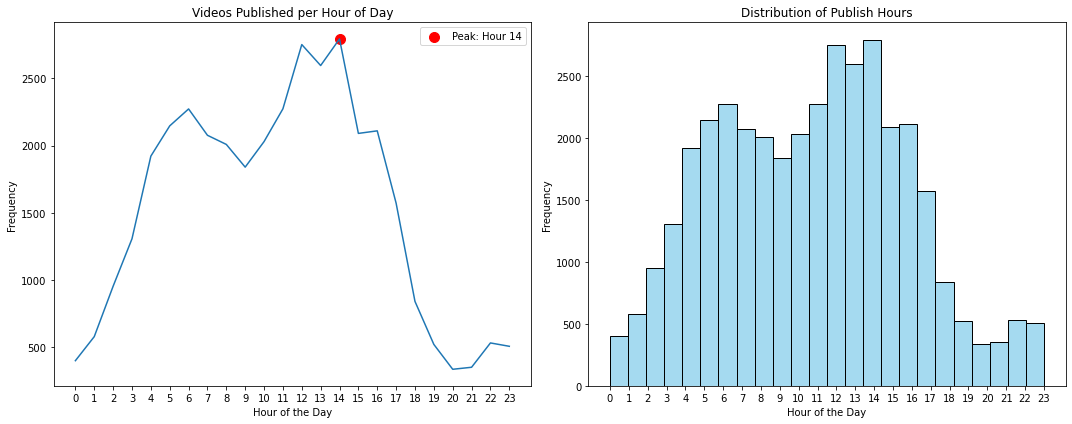

In [133]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Videos Published per Hour of Day (Line plot)
hour_counts = df_raw['publish_time_hour'].value_counts().sort_index()
axs[0].plot(hour_counts.index, hour_counts.values)

# Find the hour with maximum videos published
max_hour = hour_counts.idxmax()
max_count = hour_counts[max_hour]

# Plotting peak point
axs[0].scatter(max_hour, max_count, color='red', s=100, label=f'Peak: Hour {max_hour}')
axs[0].set_title('Videos Published per Hour of Day')
axs[0].set_xlabel('Hour of the Day')
axs[0].set_ylabel('Frequency')
axs[0].set_xticks(range(0, 24))
axs[0].legend()

# Plot 2: Distribution of Publish Hours (Histogram)
sns.histplot(df_raw['publish_time_hour'], bins=24, color='skyblue', edgecolor='black', ax=axs[1])
axs[1].set_title('Distribution of Publish Hours')
axs[1].set_xlabel('Hour of the Day')
axs[1].set_ylabel('Frequency')
axs[1].set_xticks(range(0, 24))

plt.tight_layout()
plt.show()

#### Publish time Minute per Hour

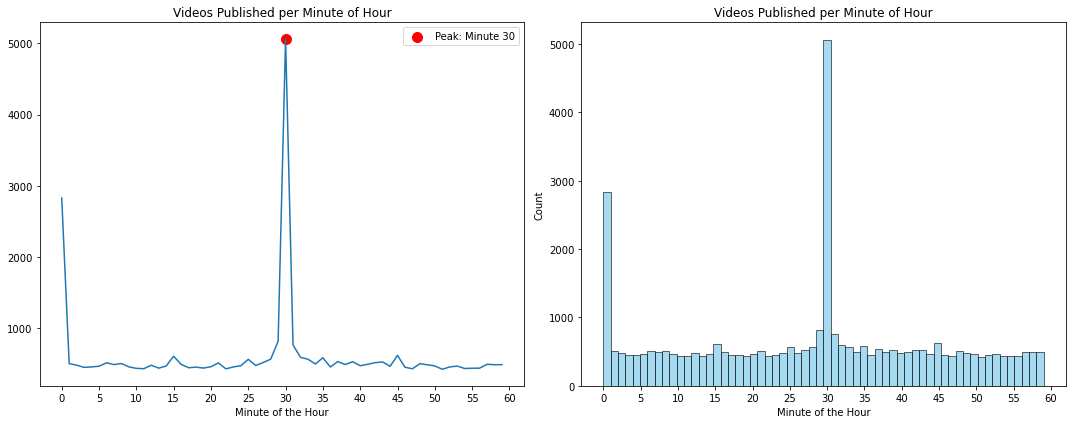

In [134]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Videos Published per Minute of Hour (Line plot)
minute_counts = df_raw['publish_time_minute'].value_counts().sort_index()
axs[0].plot(minute_counts.index, minute_counts.values)

# Find the minute with the maximum videos published
max_minute = minute_counts.idxmax()
max_minute_count = minute_counts[max_minute]

# Plotting the peak point
axs[0].scatter(max_minute, max_minute_count, color='red', s=100, label=f'Peak: Minute {max_minute}')
axs[0].set_title('Videos Published per Minute of Hour')
axs[0].set_xlabel('Minute of the Hour')
axs[0].set_xticks(range(0, 61, 5)) 
axs[0].legend()

# Plot 2: Distribution of Publish Hours (Histogram)
sns.histplot(df_raw['publish_time_minute'], bins=60, color='skyblue', edgecolor='black', ax=axs[1])
axs[1].set_title('Videos Published per Minute of Hour')
axs[1].set_xlabel('Minute of the Hour')
axs[1].set_xticks(range(0, 61, 5))

plt.tight_layout()
plt.show()

#### Publish time Second per minute

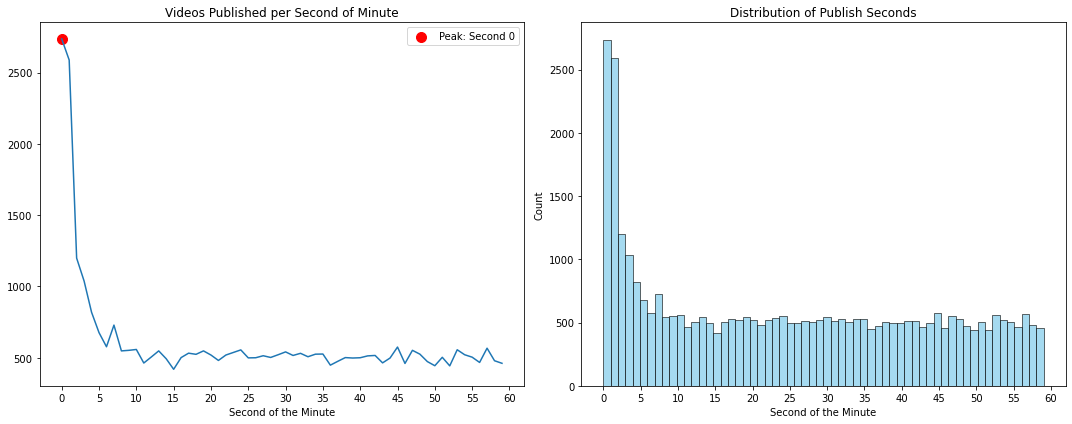

In [135]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Videos Published per Second of Minute (Line plot)
sec_counts = df_raw['publish_time_second'].value_counts().sort_index()
axs[0].plot(sec_counts.index, sec_counts.values)

# Find the second with the maximum videos published
max_sec = sec_counts.idxmax()
max_sec_count = sec_counts[max_sec]

# Plotting the peak point
axs[0].scatter(max_sec, max_sec_count, color='red', s=100, label=f'Peak: Second {max_sec}')
axs[0].set_title('Videos Published per Second of Minute')
axs[0].set_xlabel('Second of the Minute')
axs[0].set_xticks(range(0, 61, 5))
axs[0].legend()

# Plot 2: Distribution of Publish Hours (Histogram) for comparison
sns.histplot(df_raw['publish_time_second'], bins=60, color='skyblue', edgecolor='black', ax=axs[1])
axs[1].set_title('Distribution of Publish Seconds')
axs[1].set_xlabel('Second of the Minute')
axs[1].set_xticks(range(0, 61, 5))

plt.tight_layout()
plt.show()

### Publish date

In [136]:
df_raw['publish_date'] = pd.to_datetime(df_raw['publish_date'])

df_raw['year'] = df_raw['publish_date'].dt.year
df_raw['month'] = df_raw['publish_date'].dt.month
df_raw['day'] = df_raw['publish_date'].dt.day
df_raw['week'] = df_raw['publish_date'].dt.isocalendar().week

#### Publish date Daily

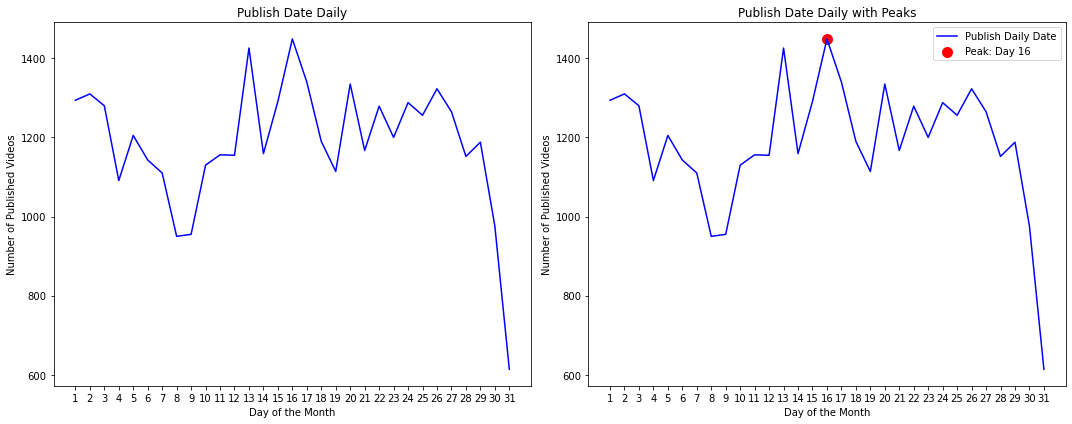

In [137]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Tren harian
daily_date = df_raw.groupby(df_raw['publish_date'].dt.day)['publish_date'].count()
axs[0].plot(daily_date.index, daily_date.values, label='Daily', color='blue')
axs[0].set_title('Publish Date Daily')
axs[0].set_xlabel('Day of the Month')
axs[0].set_ylabel('Number of Published Videos')
axs[0].set_xticks(range(1, 32))  # Mengatur rentang sumbu x dari 1 hingga 31

# Puncak pada tren harian
peaks = daily_date[daily_date == daily_date.max()]
axs[1].plot(daily_date.index, daily_date.values, label='Publish Daily Date', color='blue')
axs[1].scatter(peaks.index, peaks.values, color='red', s=100, label=f'Peak: Day {peaks.index[0]}')
axs[1].set_title('Publish Date Daily with Peaks')
axs[1].set_xlabel('Day of the Month')
axs[1].set_ylabel('Number of Published Videos')
axs[1].set_xticks(range(1, 32))  # Mengatur rentang sumbu x dari 1 hingga 31

plt.tight_layout()
plt.legend()
plt.show()

#### Publish date Weekly

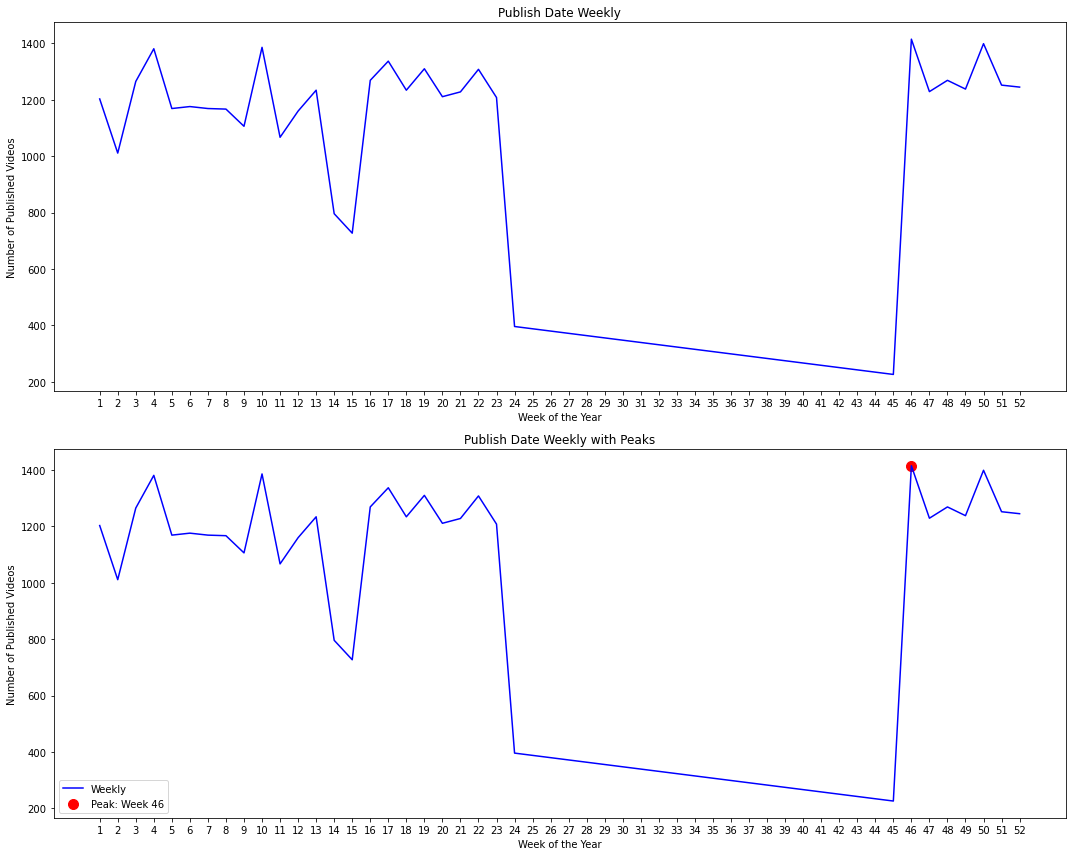

In [138]:
# Kelompokkan data berdasarkan minggu dan hitung jumlah video yang diterbitkan
weekly_date = df_raw.groupby(df_raw['publish_date'].dt.isocalendar().week)['publish_date'].count()
weekly_peaks = weekly_date[weekly_date == weekly_date.max()]

# Buat subplot dengan 2 baris dan 1 kolom
fig, axs = plt.subplots(2, 1, figsize=(15, 12))

# Plot tren mingguan di baris pertama
axs[0].plot(weekly_date.index, weekly_date.values, label='Weekly', color='blue')
axs[0].set_title('Publish Date Weekly')
axs[0].set_xlabel('Week of the Year')
axs[0].set_ylabel('Number of Published Videos')
axs[0].set_xticks(range(1, 53))  # Atur tanda sumbu x untuk menampilkan semua minggu dari 1 hingga 52

# Plot tren mingguan dengan puncak di baris kedua
axs[1].plot(weekly_date.index, weekly_date.values, label='Weekly', color='blue')
axs[1].scatter(weekly_peaks.index, weekly_peaks.values, color='red', s=100, label=f'Peak: Week {weekly_peaks.index[0]}')
axs[1].set_title('Publish Date Weekly with Peaks')
axs[1].set_xlabel('Week of the Year')
axs[1].set_ylabel('Number of Published Videos')
axs[1].set_xticks(range(1, 53))  # Atur tanda sumbu x untuk menampilkan semua minggu dari 1 hingga 52

plt.tight_layout()
plt.legend()
plt.show()


#### Publish date Monthly

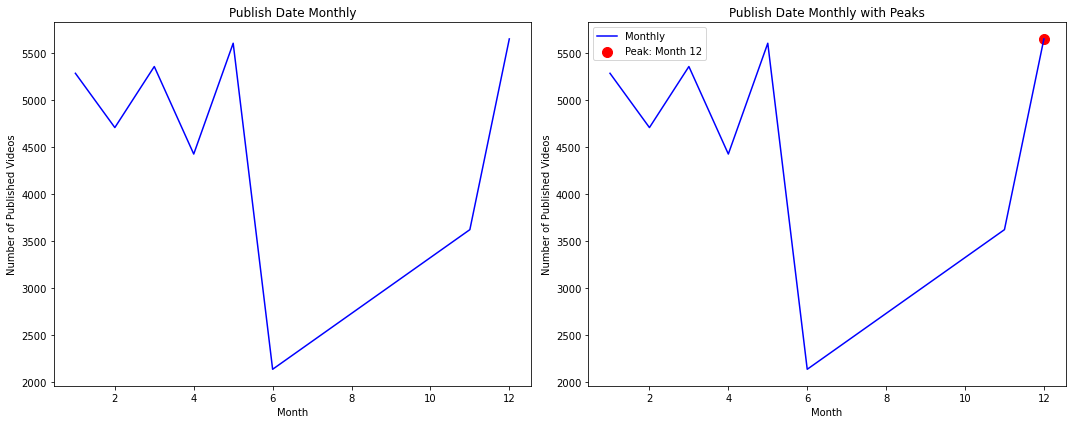

In [139]:
# Month
monthly_date = df_raw.groupby(df_raw['publish_date'].dt.month)['publish_date'].count()
monthly_peaks = monthly_date[monthly_date == monthly_date.max()]

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Monthly Trend
axs[0].plot(monthly_date.index, monthly_date.values, label='Monthly', color='blue')
axs[0].set_title('Publish Date Monthly')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Number of Published Videos')

# Monthly Trend with Peaks
axs[1].plot(monthly_date.index, monthly_date.values, label='Monthly', color='blue')
axs[1].scatter(monthly_peaks.index, monthly_peaks.values, color='red', s=100, label=f'Peak: Month {monthly_peaks.index[0]}')
axs[1].set_title('Publish Date Monthly with Peaks')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Number of Published Videos')

plt.tight_layout()
plt.legend()
plt.show()

#### Publish date Yearly

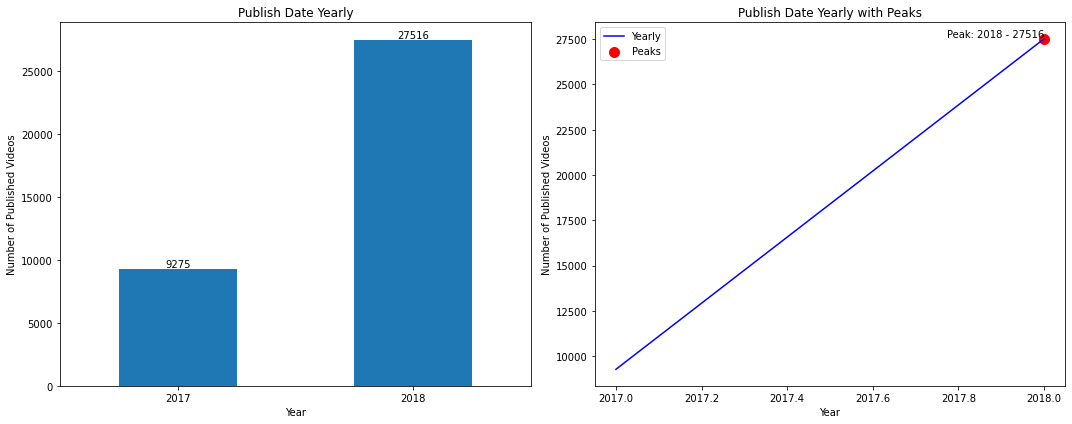

In [140]:
# Year
yearly_date = df_raw.groupby(df_raw['publish_date'].dt.year)['publish_date'].count()
yearly_peaks = yearly_date[yearly_date == yearly_date.max()]

fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Yearly Trend
yearly_date.plot(kind='bar', ax=axs[0])
axs[0].set_title('Publish Date Yearly')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Number of Published Videos')
axs[0].tick_params(axis='x', rotation=0)  # Set x-axis labels rotation to 0 degrees
for bar in axs[0].patches:
    axs[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height()}', 
                 ha='center', va='bottom')

# Yearly Trend with Peaks
axs[1].plot(yearly_date.index, yearly_date.values, label='Yearly', color='blue')
axs[1].scatter(yearly_peaks.index, yearly_peaks.values, color='red', s=100, label='Peaks')
axs[1].set_title('Publish Date Yearly with Peaks')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Number of Published Videos')
axs[1].tick_params(axis='x', rotation=0) 

# Add labels to peak points in the bottom right corner
for i, peak in enumerate(yearly_peaks.items()):
    axs[1].text(peak[0], peak[1], f'Peak: {peak[0]} - {peak[1]}', ha='right', va='bottom', color='black')

plt.tight_layout()
plt.legend()
plt.show()

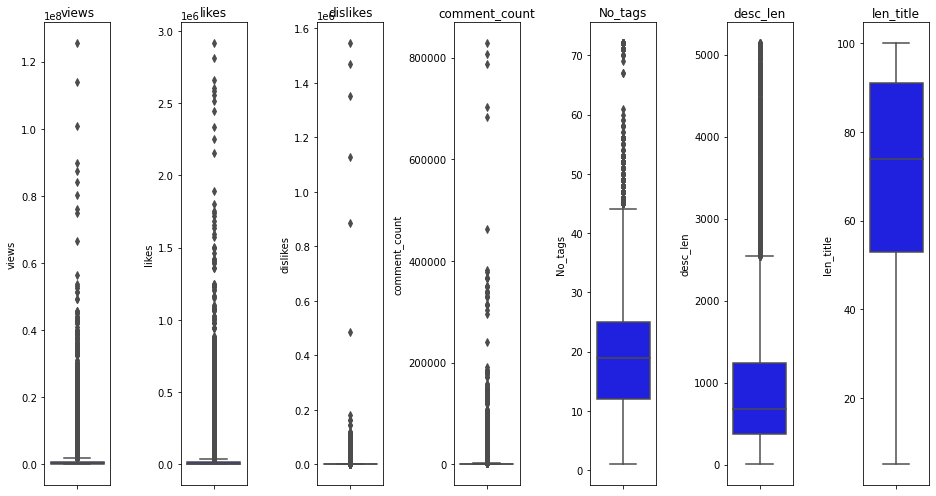

In [141]:
plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(1, 8, i+1)
    plt.title(nums[i])
    sns.boxplot(y=df[nums[i]],color='blue',orient='v')
    plt.tight_layout()

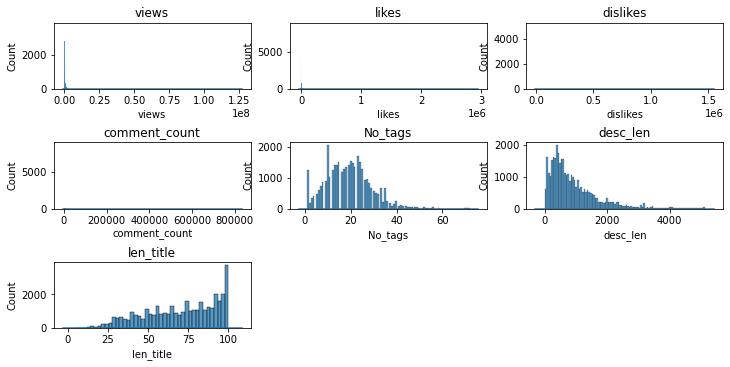

In [142]:
plt.figure(figsize=(12,10))
for i in range(len(nums)):
    plt.subplot(5,3,i+1)
    plt.subplots_adjust(hspace=0.8)
    sns.histplot(data = df, x = nums[i])
    sns.kdeplot(data = df, x = nums[i])
    plt.title(nums[i])
    plt.xlabel(nums[i])
    

### Heatmap Correlation

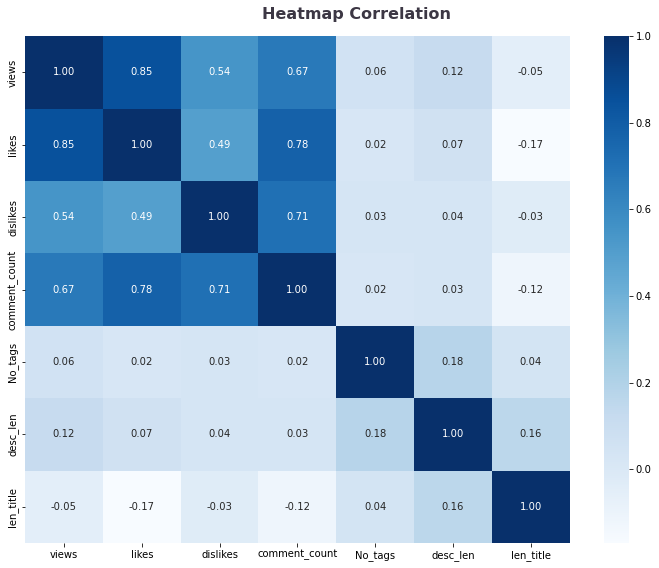

In [143]:
plt.figure(figsize=(10,8))
sns.heatmap(df[nums].corr(), annot=True, fmt='.2f', cmap='Blues')
plt.suptitle('Heatmap Correlation', color='#3C3744', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

Kesimpulan Simple EDA

- pada features yang bertipe numerikal terdapat banyak outlier yang perlu dihandle
- pada features 'view', 'like', 'dislike', 'comment_count', distribusinya positive skewed
- pada korelasi heatmap feature 'like', 'dislike', 'comment_count', memiliki tingkat korelasi yang tinggi, yang memungkinkan untuk menjadi fitur yang penting dalam modeling machiner learning ini


## Data Preprocessing


### Check Missing Values

In [144]:
df.isna().sum()

trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               45
No_tags                    0
desc_len                   0
len_title                  0
publish_date               0
dtype: int64

In [145]:
df_pre['description'] = df_pre['description'].fillna(df_pre['description'].mode()[0])

In [146]:
df_pre.isna().sum()

trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
No_tags                   0
desc_len                  0
len_title                 0
publish_date              0
dtype: int64

### Check duplicated values

In [147]:
df.duplicated().sum()

4229

In [148]:
df_pre = df.drop_duplicates()

In [149]:
df_pre.duplicated().sum()

0

### Handling Outliers

In [150]:
from scipy import stats

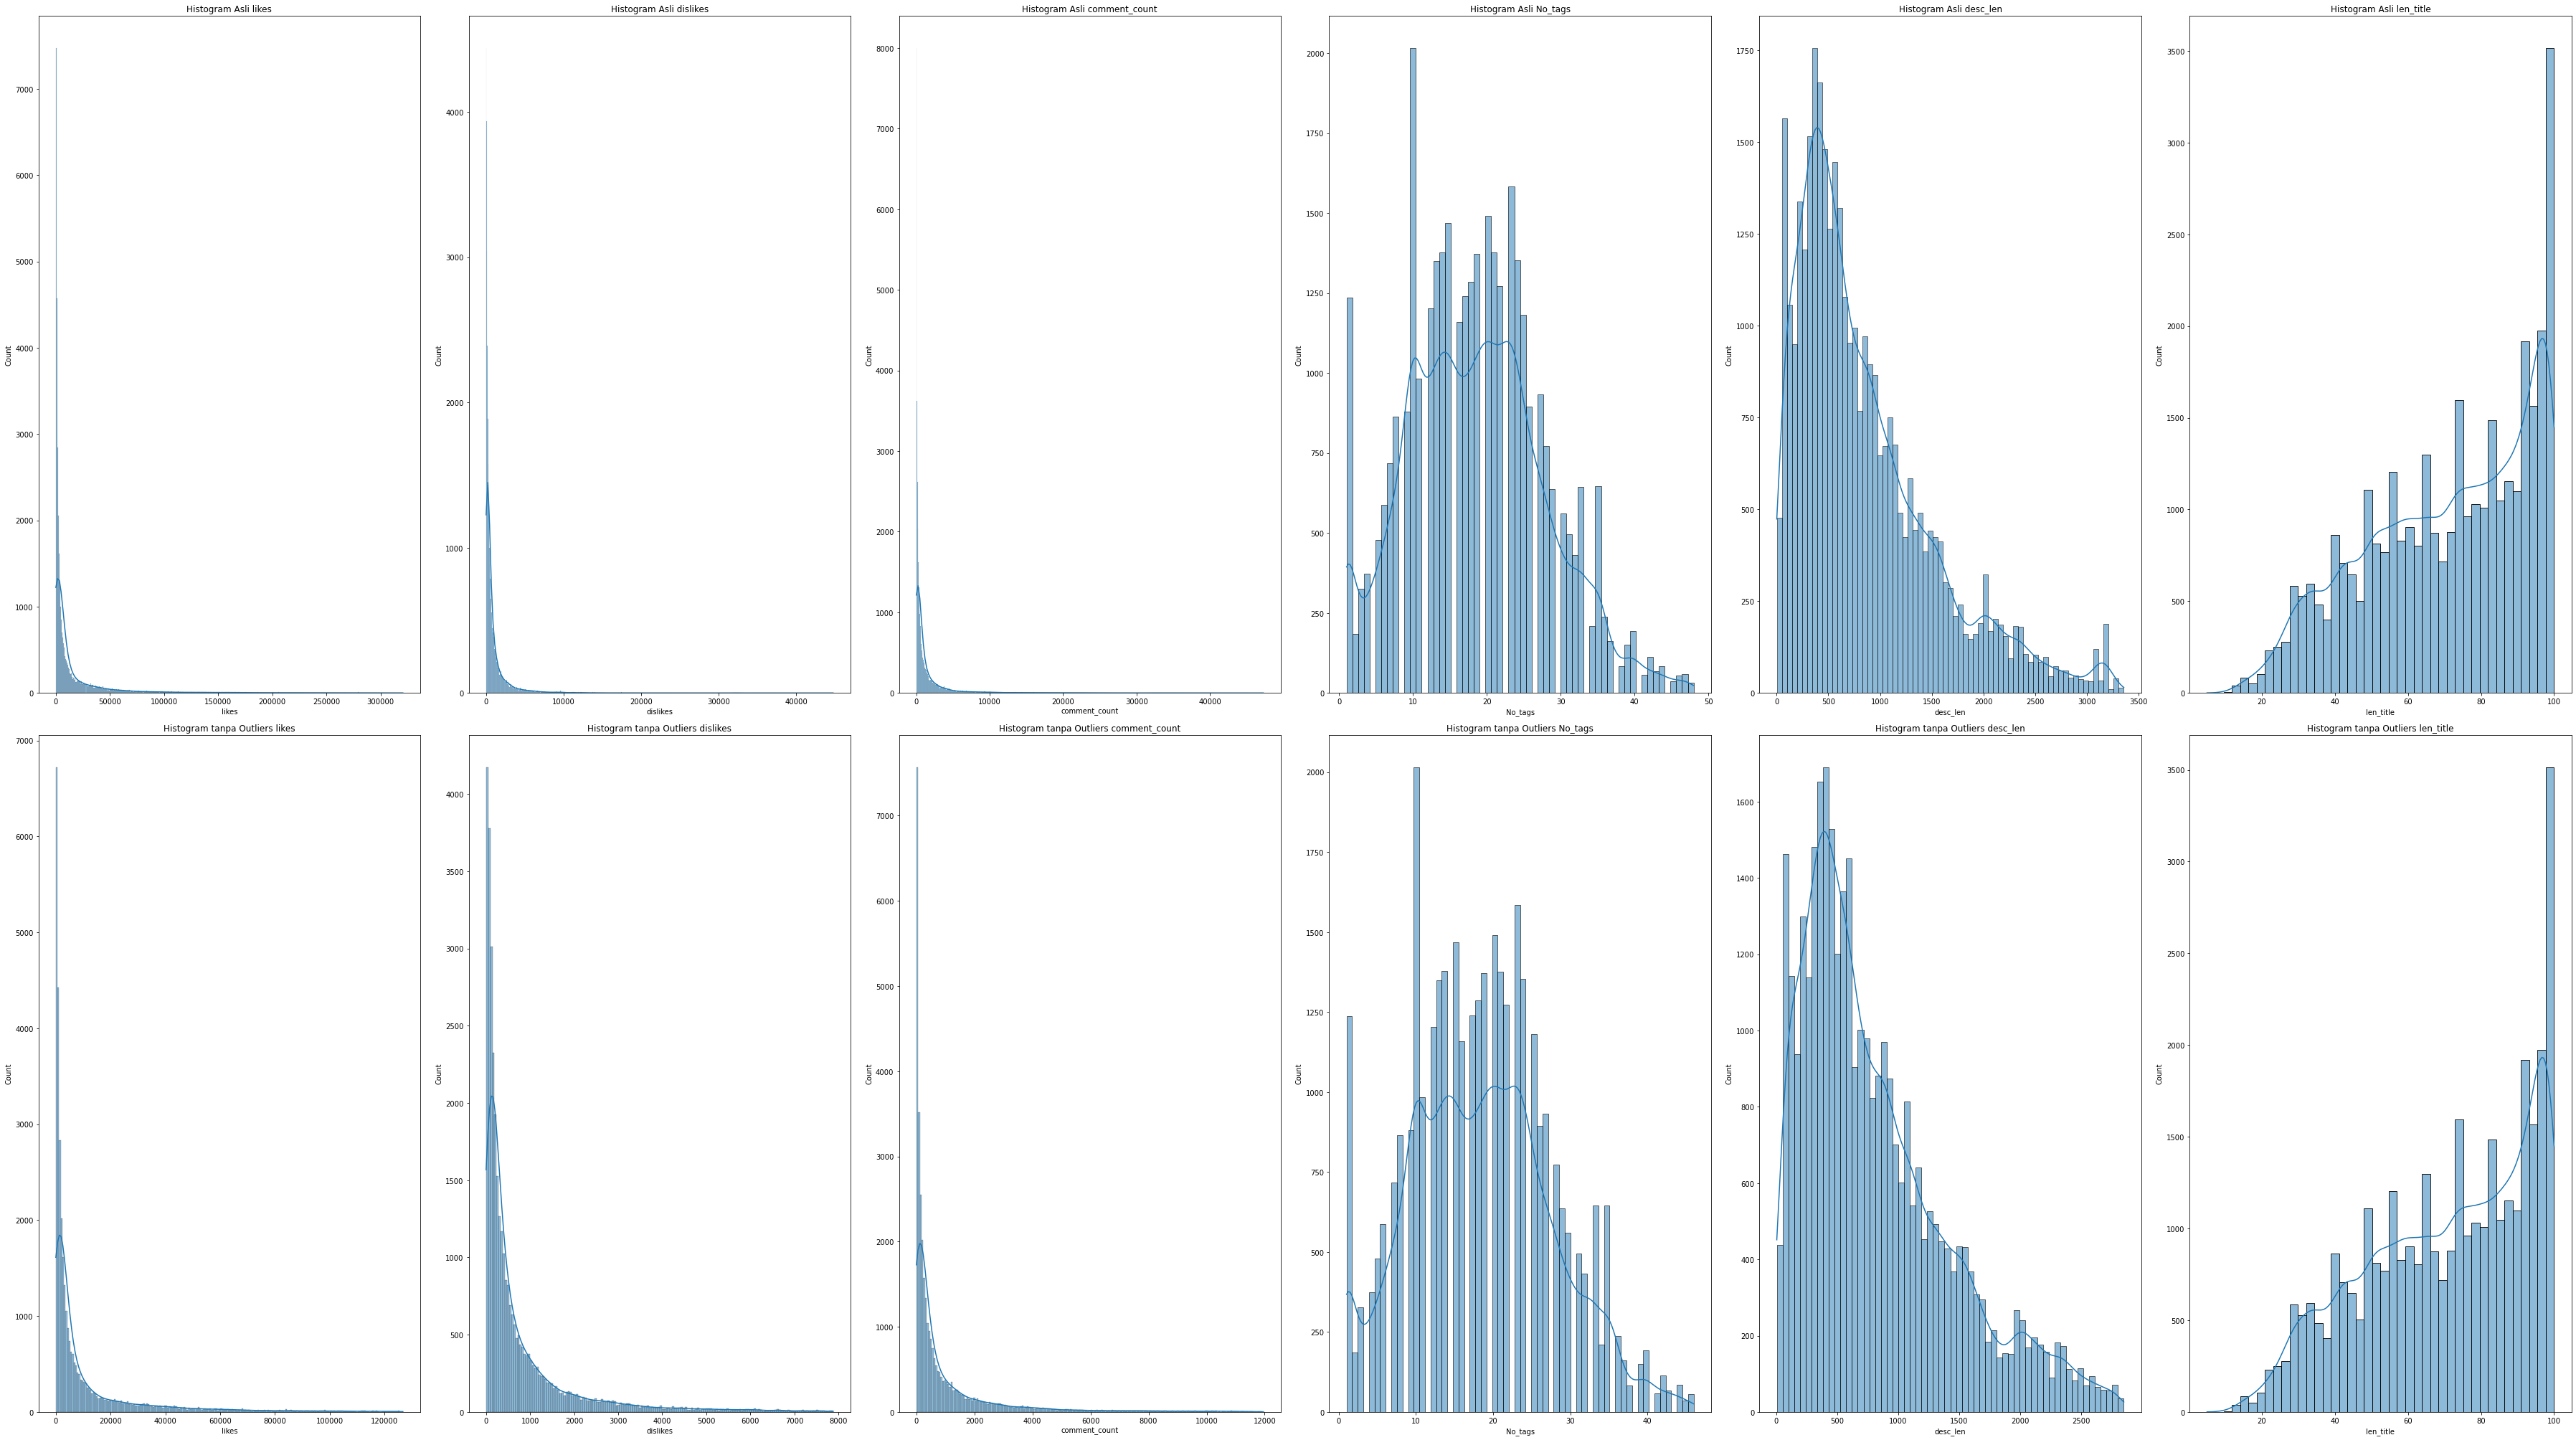

In [162]:
nums = ['likes', 'dislikes', 'comment_count', 'No_tags', 'desc_len', 'len_title']

plt.figure(figsize=(50, 28))  # Tetapkan ukuran gambar secara keseluruhan

# Loop melalui setiap kolom numerik
for i in range(len(nums)):
    current_column = nums[i]


    plt.subplot(2, len(nums), i + 1)
    sns.histplot(df[current_column], kde=True)
    plt.title(f'Histogram Asli {current_column}')
    plt.xlabel(current_column)

    # Hitung Z-score
    z_scores = np.abs((df[current_column] - df[current_column].mean()) / df[current_column].std())
    
    threshold = 3

    # Identifikasi dan tangani outliers
    outliers = df[z_scores > threshold]
    df_no_outliers = df[z_scores <= threshold]

    # Gunakan Seaborn untuk menggambar histogram tanpa outliers
    plt.subplot(2, len(nums), i + 1 + len(nums))
    sns.histplot(df_no_outliers[current_column], kde=True)
    plt.title(f'Histogram tanpa Outliers {current_column}')
    plt.xlabel(current_column)
plt.tight_layout()
plt.show()

### Log Transform

In [167]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [169]:
for col in nums:
  if col != 'views':
    df[col+'_norm'] = MinMaxScaler().fit_transform(df[col].values.reshape(len(df), 1))

In [170]:
for col in nums:
  if col != 'views':
    df['log_'+col] = np.log(df[col])

In [171]:
df_log = ['log_likes', 'log_dislikes', 'log_comment_count', 'log_No_tags', 'log_desc_len', 'log_len_title']

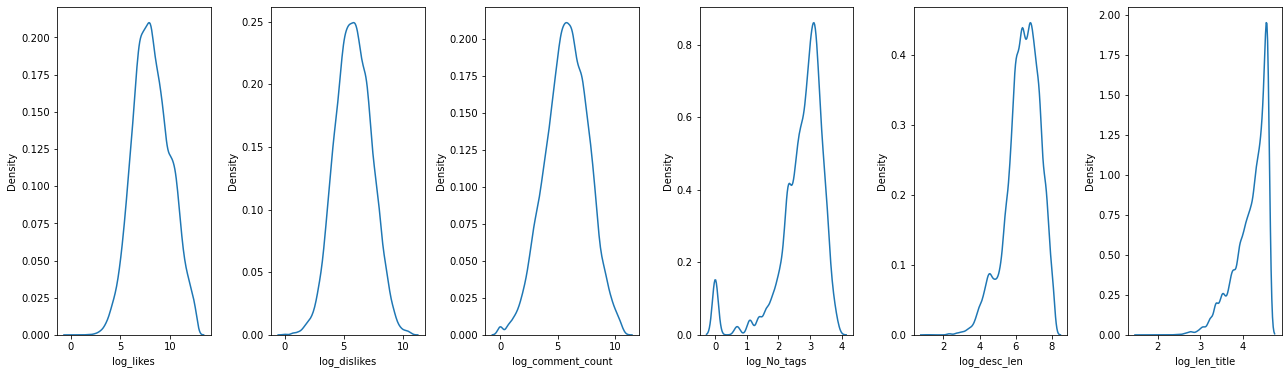

In [173]:
plt.figure(figsize=(18, 10))
for i in range(0, len(df_log)):
      plt.subplot(2, len(df_log), i+1)
      sns.kdeplot(df[df_log[i]])
      plt.tight_layout()